# Credit Card Spending Habits in India



#### About this file
This dataset contains insights into credit card transactions made in India, offering a comprehensive look at the spending habits of Indians across the nation

1. City: The city in which the transaction took place. (String)
2. Date: The date of the transaction. (Date)
3. Card Type: The type of credit card used for the transaction. (String)
4. Exp Type: The type of expense associated with the transaction. (String)
5. Gender: The gender of the cardholder. (String)
6. Amount: The amount of the transaction. (Number)



In [101]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly.express as px
from datetime import datetime

In [2]:
dataset = pd.read_csv("Credit card transactions - India - Simple.csv")
dataset.head()

index                   City       Date  Card Type Exp Type Gender  Amount
0      0           Delhi, India  29-Oct-14       Gold    Bills      F   82475
1      1  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   32555
2      2       Bengaluru, India  27-Aug-14     Silver    Bills      F  101738
3      3  Greater Mumbai, India  12-Apr-14  Signature    Bills      F  123424
4      4       Bengaluru, India   5-May-15       Gold    Bills      F  171574

In [3]:
#. Check duplicate values
dataset.duplicated().sum()

0

In [4]:
# check null values

dataset.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [5]:
# Split city into city and country

dataset[['City','Country']] = dataset['City'].str.split(",",expand=True)

In [6]:
dataset

index            City       Date  Card Type Exp Type Gender  Amount  \
0          0           Delhi  29-Oct-14       Gold    Bills      F   82475   
1          1  Greater Mumbai  22-Aug-14   Platinum    Bills      F   32555   
2          2       Bengaluru  27-Aug-14     Silver    Bills      F  101738   
3          3  Greater Mumbai  12-Apr-14  Signature    Bills      F  123424   
4          4       Bengaluru   5-May-15       Gold    Bills      F  171574   
...      ...             ...        ...        ...      ...    ...     ...   
26047  26047         Kolkata  22-Jun-14     Silver   Travel      F  128191   
26048  26048            Pune   3-Aug-14  Signature   Travel      M  246316   
26049  26049       Hyderabad  16-Jan-15     Silver   Travel      M  265019   
26050  26050          Kanpur  14-Sep-14     Silver   Travel      M   88174   
26051  26051       Hyderabad  19-Oct-13  Signature    Bills      M  184410   

      Country  
0       India  
1       India  
2       India  
3       India  
4       India  
...       ...  
26047   India  
26048   India  
26049   India  
26050   India  
26051   India  

[26052 rows x 8 columns]

In [7]:
dataset[['Date','Month','Year']] = dataset.Date.str.split("-",expand=True)

In [8]:
dataset

index            City Date  Card Type Exp Type Gender  Amount Country  \
0          0           Delhi   29       Gold    Bills      F   82475   India   
1          1  Greater Mumbai   22   Platinum    Bills      F   32555   India   
2          2       Bengaluru   27     Silver    Bills      F  101738   India   
3          3  Greater Mumbai   12  Signature    Bills      F  123424   India   
4          4       Bengaluru    5       Gold    Bills      F  171574   India   
...      ...             ...  ...        ...      ...    ...     ...     ...   
26047  26047         Kolkata   22     Silver   Travel      F  128191   India   
26048  26048            Pune    3  Signature   Travel      M  246316   India   
26049  26049       Hyderabad   16     Silver   Travel      M  265019   India   
26050  26050          Kanpur   14     Silver   Travel      M   88174   India   
26051  26051       Hyderabad   19  Signature    Bills      M  184410   India   

      Month Year  
0       Oct   14  
1       Aug   14  
2       Aug   14  
3       Apr   14  
4       May   15  
...     ...  ...  
26047   Jun   14  
26048   Aug   14  
26049   Jan   15  
26050   Sep   14  
26051   Oct   13  

[26052 rows x 10 columns]

In [9]:
dataset.Year.unique()

array(['14', '15', '13'], dtype=object)

In [10]:
dataset.Year = "20"+dataset.Year

In [11]:
# change datatype from object to int of Year column
dataset.Year = dataset.Year.astype(int)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
 7   Country    26052 non-null  object
 8   Month      26052 non-null  object
 9   Year       26052 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.0+ MB


In [13]:
# drop index

dataset.drop('index', axis=1,inplace=True)

In [14]:
dataset

City Date  Card Type Exp Type Gender  Amount Country Month  \
0               Delhi   29       Gold    Bills      F   82475   India   Oct   
1      Greater Mumbai   22   Platinum    Bills      F   32555   India   Aug   
2           Bengaluru   27     Silver    Bills      F  101738   India   Aug   
3      Greater Mumbai   12  Signature    Bills      F  123424   India   Apr   
4           Bengaluru    5       Gold    Bills      F  171574   India   May   
...               ...  ...        ...      ...    ...     ...     ...   ...   
26047         Kolkata   22     Silver   Travel      F  128191   India   Jun   
26048            Pune    3  Signature   Travel      M  246316   India   Aug   
26049       Hyderabad   16     Silver   Travel      M  265019   India   Jan   
26050          Kanpur   14     Silver   Travel      M   88174   India   Sep   
26051       Hyderabad   19  Signature    Bills      M  184410   India   Oct   

       Year  
0      2014  
1      2014  
2      2014  
3      2014  
4      2015  
...     ...  
26047  2014  
26048  2014  
26049  2015  
26050  2014  
26051  2013  

[26052 rows x 9 columns]

### EDA

In [15]:
dataset.Year  = round(dataset.Year, 0)

<AxesSubplot:>

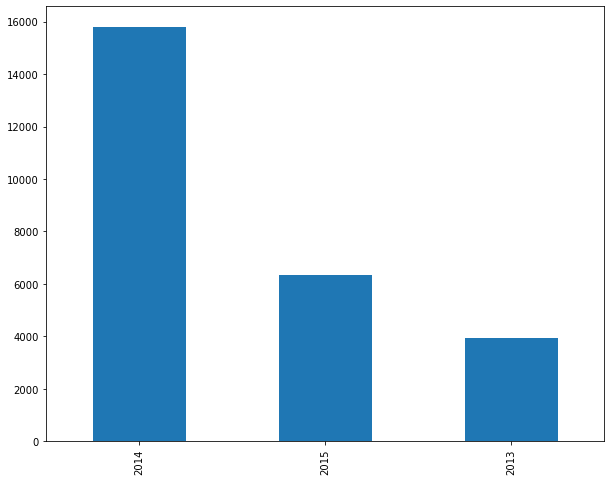

In [16]:
plt.figure(figsize=(10,8))
dataset.Year.value_counts().plot.bar()

In [17]:
a = dataset.groupby('City')['Amount'].sum().sort_values(ascending = False).head(10)
a

City
Greater Mumbai    576751476
Bengaluru         572326739
Ahmedabad         567794310
Delhi             556929212
Kolkata           115466943
Lucknow           115334476
Chennai           114730600
Hyderabad         114493477
Surat             114486151
Kanpur            114370532
Name: Amount, dtype: int64

In [27]:
a = dataset.groupby('City',as_index=False)[['Amount']].sum().rename({"Amount":"Amount_Sum"},axis=1).sort_values(by = "Amount_Sum",ascending = False)
a

City  Amount_Sum
170  Greater Mumbai   576751476
71        Bengaluru   572326739
8         Ahmedabad   567794310
126           Delhi   556929212
267         Kolkata   115466943
..              ...         ...
106   Changanassery       30074
881           Tirur       26094
52         Bahraich       24253
317     Mahbubnagar       15458
152         Fazilka       14949

[986 rows x 2 columns]

In [39]:
fig = px.bar(data_frame=a[:10] ,x="City", y="Amount_Sum", color="City", text_auto=True,template="seaborn",
       title="<b> Top 10 Cities who spending more in India")
fig.show()

In [42]:
# Exp type

dataset["Exp Type"].value_counts()

Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64

In [44]:
Exp = dataset.groupby("Exp Type", as_index=False)[["Amount"]].sum()
Exp

Exp Type     Amount
0          Bills  907072473
1  Entertainment  726437536
2           Food  824724009
3           Fuel  789135821
4        Grocery  718207923
5         Travel  109255611

In [49]:
px.pie(Exp, values="Amount" , names="Exp Type" , hole = 0.7 ,
       template="seaborn" ,title= "<b> Transaction Exp type details" )

In [56]:
gen = dataset.groupby("Gender", as_index=False)[["Amount"]].sum()
gen

Gender      Amount
0      F  2205311030
1      M  1869522343

In [60]:
px.pie(gen , names="Gender", values="Amount", hole=.7, title="<b> Gender wise spending in India", template="seaborn")

In [72]:
s = dataset.groupby(["Year","Month"], as_index=False)[["Amount"]].sum().sort_values(by = ["Amount"], ascending = False)
s

Year Month     Amount
17  2015   Jan  223558574
4   2014   Aug  218453126
0   2013   Dec  214267829
13  2014   Oct  212485915
12  2014   Nov  212092005
14  2014   Sep  209561433
3   2014   Apr  208284732
15  2015   Apr  208110002
7   2014   Jan  207650982
2   2013   Oct  207360092
18  2015   Mar  206821139
10  2014   Mar  203233307
5   2014   Dec  202667586
11  2014   May  201762312
8   2014   Jul  197981416
16  2015   Feb  194292444
1   2013   Nov  192015963
9   2014   Jun  191321039
6   2014   Feb  189220180
19  2015   May  173693297

In [82]:
px.bar(s[:10], x="Year", y="Amount", text = "Month" , color = "Month")

In [85]:
z = dataset["Card Type"].value_counts()
z

Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Card Type, dtype: int64

In [91]:
px.pie(dataset, names="Card Type", values="Amount", color="Card Type")

In [98]:
dataset.groupby(["Exp Type","Card Type"]).sum().unstack(level=-1).T

Exp Type              Bills  Entertainment       Food       Fuel    Grocery  \
       Card Type                                                              
Amount Gold       225533948      173468463  193756454  194343922  166246853   
       Platinum   222027597      185608738  210318810  194069361  171360820   
       Signature  226115472      178648981  206247814  187797487  186732315   
       Silver     233395456      188711354  214400931  212925051  193867935   
Year   Gold         2529717        2302082    2662623    2648523    2253777   
       Platinum     2475297        2390705    2761341    2622357    2275938   
       Signature    2535752        2356471    2676743    2590135    2465227   
       Silver       2686785        2541776    2902318    2727118    2580043   

Exp Type            Travel  
       Card Type            
Amount Gold       31189896  
       Platinum   24253693  
       Signature  27499036  
       Silver     26312986  
Year   Gold         427008  
       Platinum     360537  
       Signature    360492  
       Silver       338370

In [115]:
dataset["Year"]=pd.to_datetime(dataset["Year"],format="%Y").dt.strftime('%Y')

In [118]:
dataset.groupby(["Exp Type","Card Type"]).sum().unstack(level=-1).T


Exp Type              Bills  Entertainment       Food       Fuel    Grocery  \
       Card Type                                                              
Amount Gold       225533948      173468463  193756454  194343922  166246853   
       Platinum   222027597      185608738  210318810  194069361  171360820   
       Signature  226115472      178648981  206247814  187797487  186732315   
       Silver     233395456      188711354  214400931  212925051  193867935   

Exp Type            Travel  
       Card Type            
Amount Gold       31189896  
       Platinum   24253693  
       Signature  27499036  
       Silver     26312986

In [130]:
px.histogram(dataset, y = "Exp Type" , x= "Amount",color="Card Type", text_auto=True,
            title= 'Histogram of Card Type, Exp Type and Amount', template="seaborn").update_layout(yaxis={'categoryorder':'total ascending'})

<AxesSubplot:xlabel='Exp Type'>

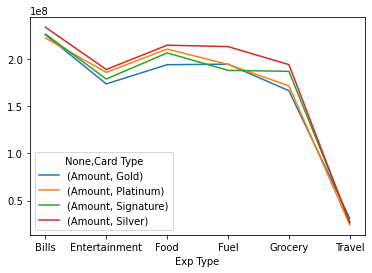

In [135]:
dataset.groupby(["Exp Type","Card Type"]).sum().unstack(level=-1).plot()


In [137]:
a = dataset.groupby(["Exp Type","Card Type"]).sum().unstack(level=-1)
a


Amount                                 
Card Type           Gold   Platinum  Signature     Silver
Exp Type                                                 
Bills          225533948  222027597  226115472  233395456
Entertainment  173468463  185608738  178648981  188711354
Food           193756454  210318810  206247814  214400931
Fuel           194343922  194069361  187797487  212925051
Grocery        166246853  171360820  186732315  193867935
Travel          31189896   24253693   27499036   26312986

<AxesSubplot:xlabel='None-Card Type', ylabel='Exp Type'>

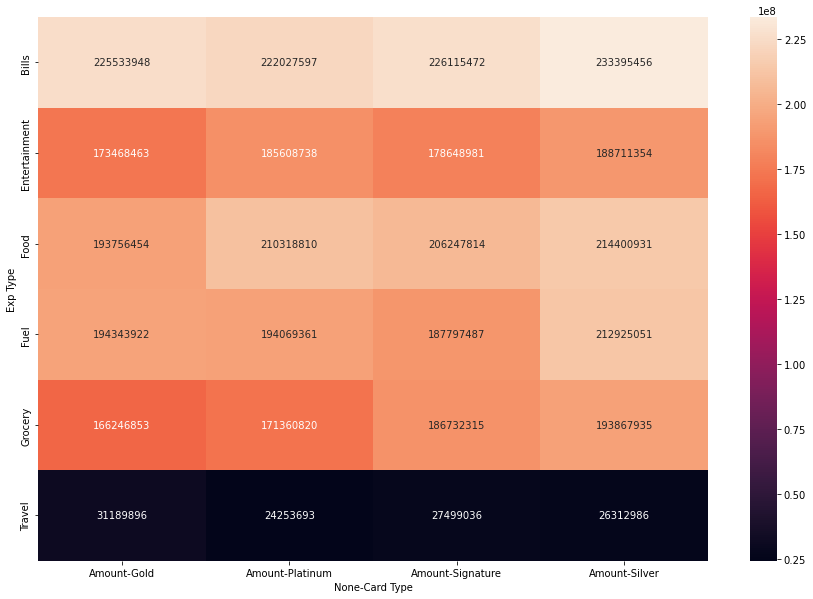

In [143]:
plt.figure(figsize=(15,10))
sns.heatmap(data=a , annot=True, fmt=".0f")

In [146]:
dataset["Month_Year"] = dataset["Month"]+" " +dataset["Year"]

In [147]:
dataset["Month_Year"].value_counts()

Aug 2014    1393
Dec 2013    1379
Jan 2015    1377
Oct 2014    1374
Nov 2014    1365
Jan 2014    1345
Dec 2014    1323
Sep 2014    1321
May 2014    1321
Mar 2014    1314
Jul 2014    1310
Mar 2015    1308
Apr 2014    1295
Apr 2015    1292
Oct 2013    1291
Nov 2013    1257
Feb 2015    1242
Jun 2014    1239
Feb 2014    1191
May 2015    1115
Name: Month_Year, dtype: int64

### Spending patern by year and months

<AxesSubplot:xlabel='Month_Year', ylabel='Amount'>

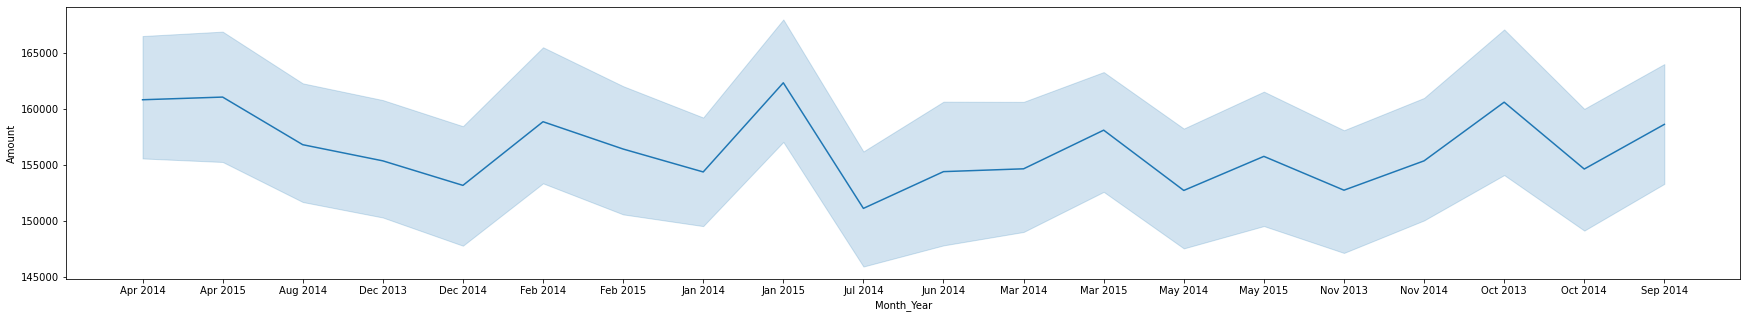

In [151]:
plt.figure(figsize=(30,5))
sns.lineplot(data=dataset.sort_values(by = "Month_Year"), x="Month_Year", y="Amount")

## Spending by Gender wise

<AxesSubplot:xlabel='Month_Year', ylabel='Amount'>

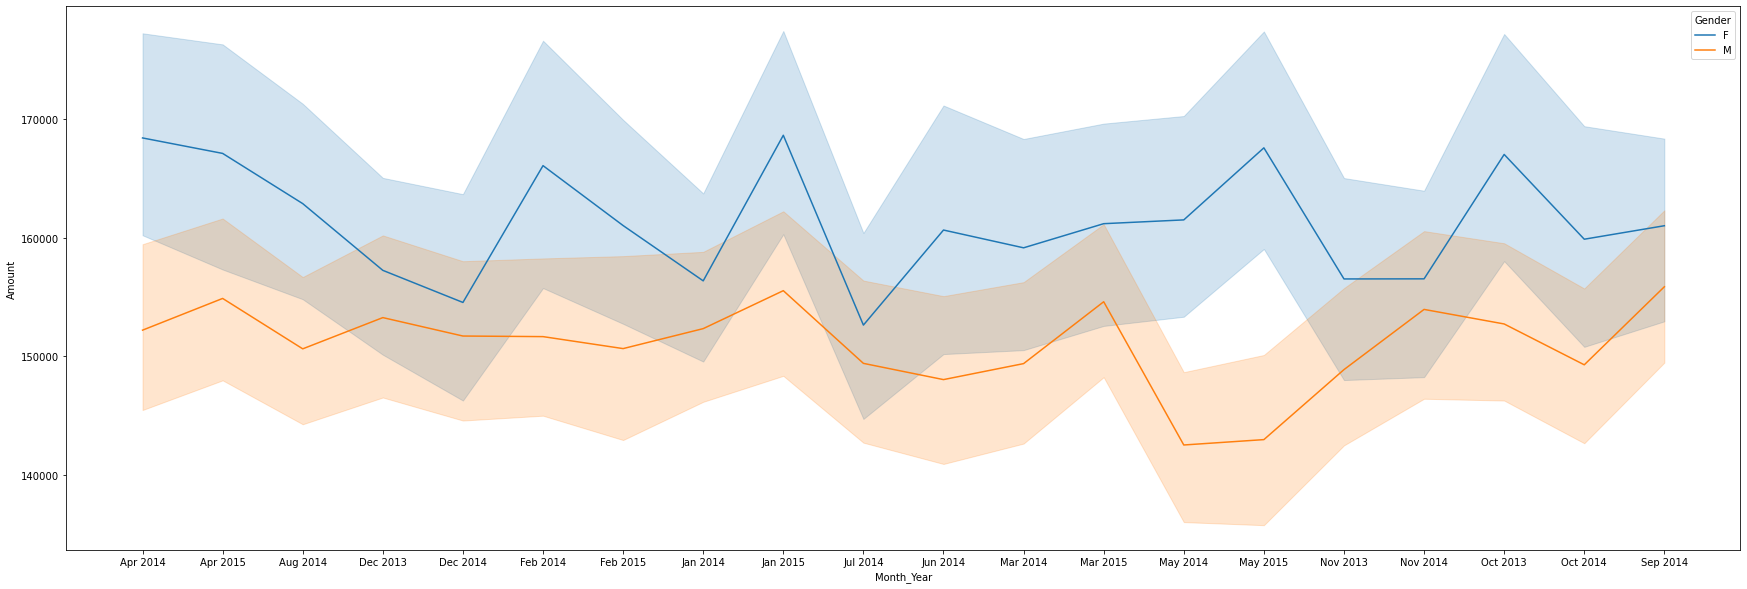

In [155]:
plt.figure(figsize=(30,10))
sns.lineplot(data=dataset.sort_values(by = "Month_Year"), x="Month_Year", y="Amount", hue="Gender")

In [160]:
px.histogram(dataset,x="Exp Type", y="Amount", color="Gender", barmode="group", text_auto=True,color_
             discrete_map={"F":"pink","M":"green"})

<Figure size 0x720 with 0 Axes>

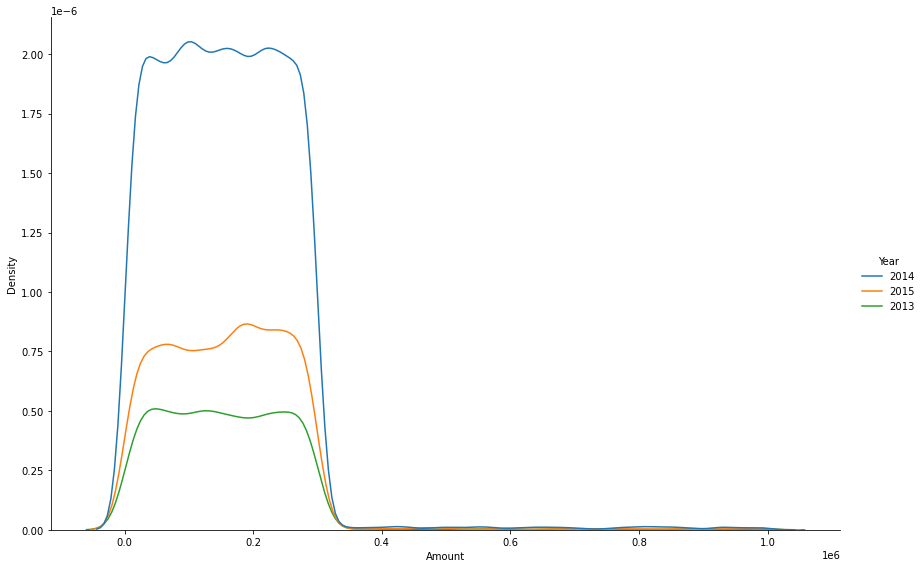

In [170]:
# plt.figure(figsize=(0,10))
sns.displot(data=dataset,x="Amount",hue="Year",kind = "kde", height=8, aspect=1.5)
plt.show()

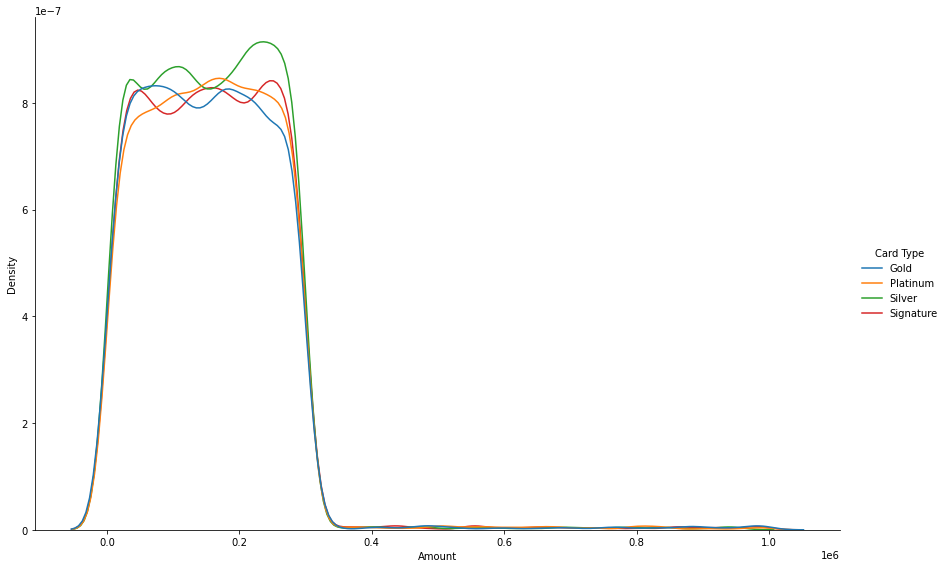

In [171]:
# plt.figure(figsize=(0,10))
sns.displot(data=dataset,x="Amount",hue="Card Type",kind = "kde", height=8, aspect=1.5)
plt.show()

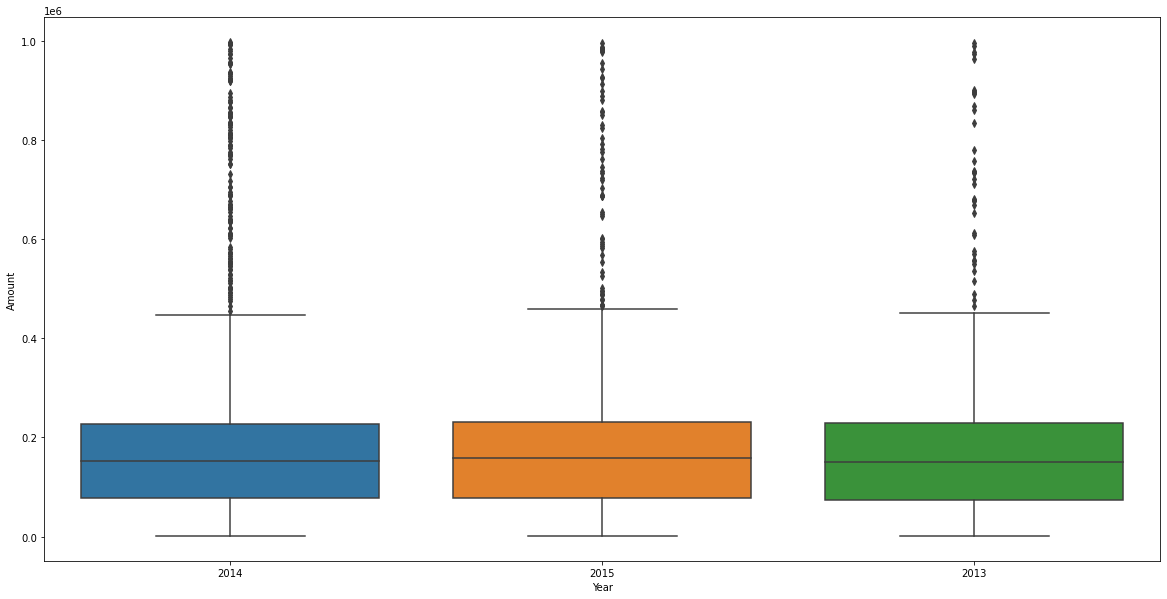

In [175]:
plt.figure(figsize=(20,10))

sns.boxplot(data=dataset, x="Year", y="Amount")
plt.show()

In [178]:
dataset.to_csv("Dataset after EDA.csv")